# K Sharath Chand ASSIGNMENT-3 APPLIED DATA SCIENCE

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [112]:

# Step 2: Load the dataset into the tool
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASSIGNMENTS/Housing.csv')
print(dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

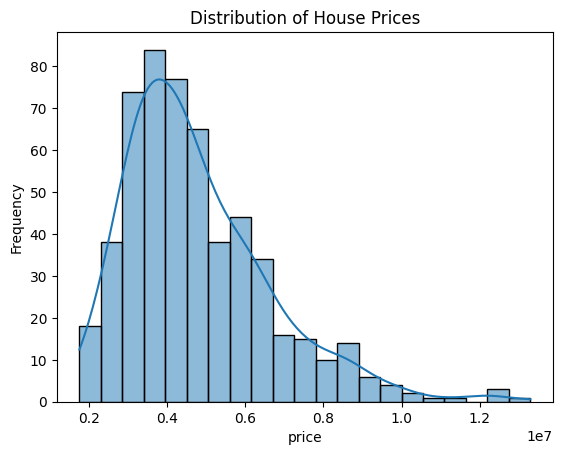

In [113]:
# Step 3: Perform Visualizations
# Univariate Analysis
sns.histplot(dataset['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

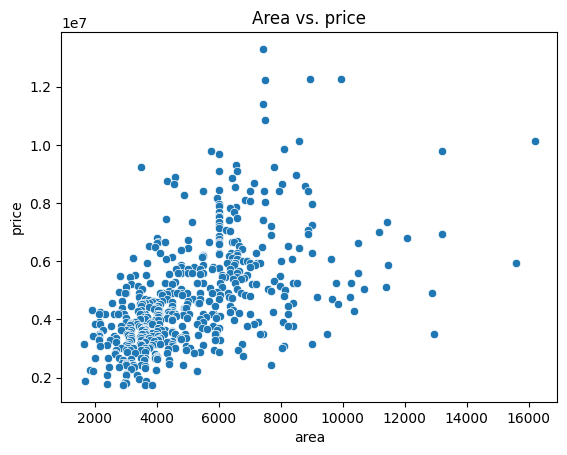

In [114]:
# Bi-Variate Analysis
sns.scatterplot(x='area', y='price', data=dataset)
plt.title('Area vs. price')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

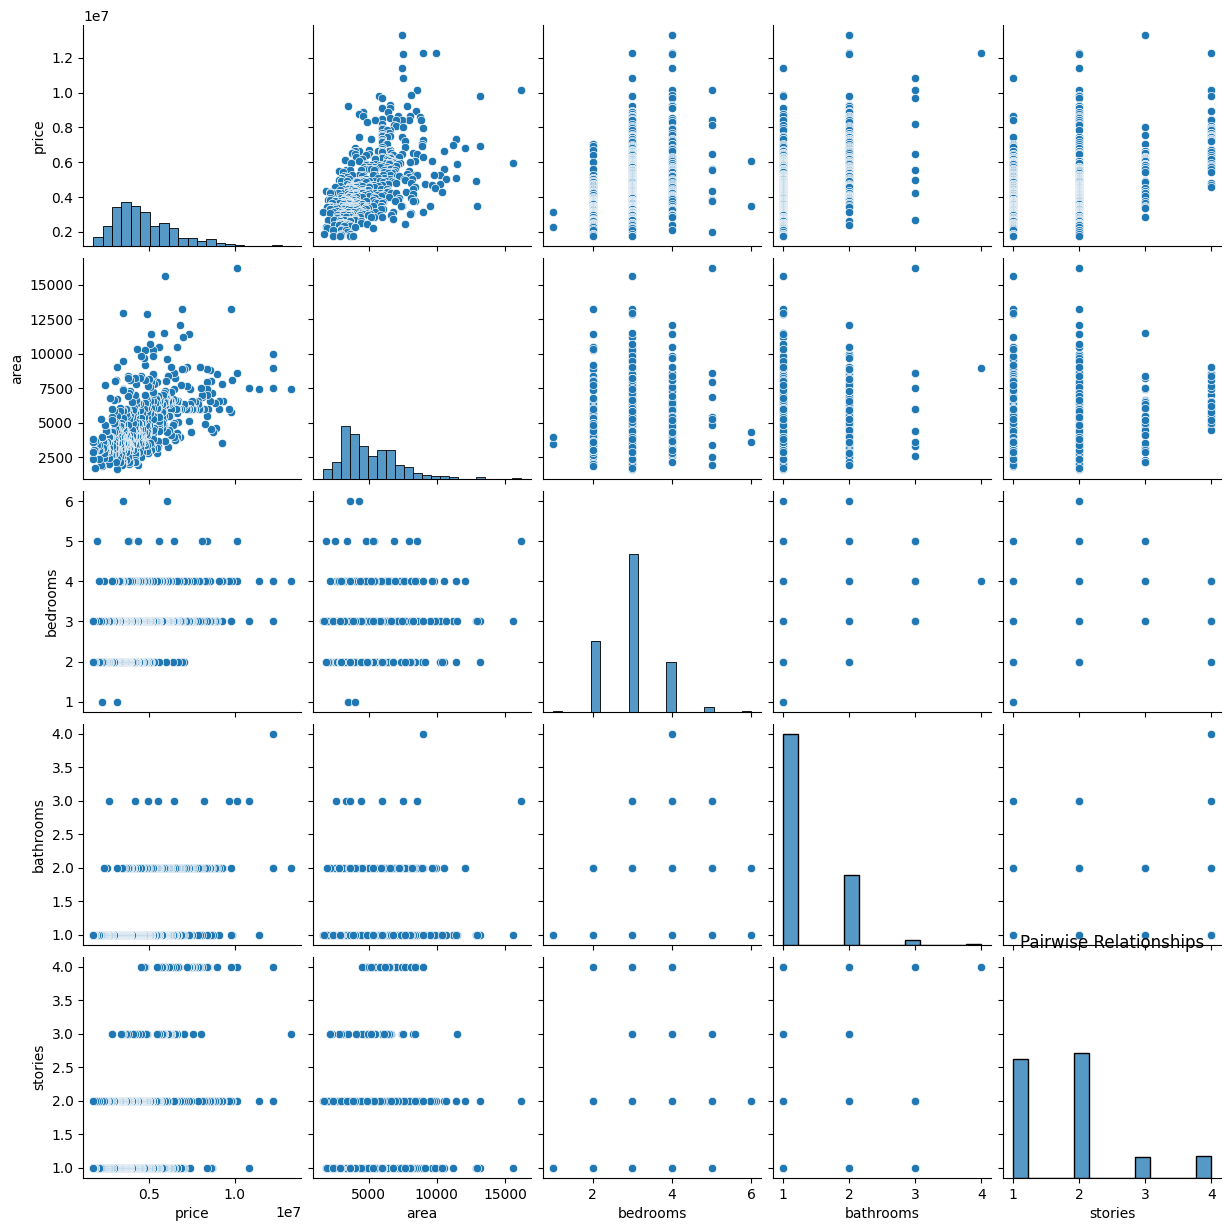

In [115]:
# Multi-Variate Analysis
sns.pairplot(dataset[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])
plt.title('Pairwise Relationships')
plt.show()

In [116]:
# Step 4: Perform descriptive statistics
descriptive_stats = dataset.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [117]:
# Step 5: Check for missing values and deal with them
missing_values = dataset.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [118]:
# Step 6: Find and replace outliers
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
dataset['price'] = dataset['price'].apply(lambda x: upper_limit if x > upper_limit else x)
print(dataset['price'])

0      9205000.0
1      9205000.0
2      9205000.0
3      9205000.0
4      9205000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64


In [119]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [120]:
# Step 7: Check for categorical columns and perform encoding
categorical_cols = ['furnishingstatus']

# Perform label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])


In [121]:
# Step 8: Split the data into dependent and independent variables
X = dataset.drop('price', axis=1)
y = dataset['price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,0
1,8960,4,4,4,yes,no,no,no,yes,3,0
2,9960,3,2,2,yes,no,yes,no,no,2,1
3,7500,4,2,2,yes,no,yes,no,yes,3,0
4,7420,4,1,2,yes,yes,yes,no,yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,2
541,2400,3,1,1,no,no,no,no,no,0,1
542,3620,2,1,1,yes,no,no,no,no,0,2
543,2910,3,1,1,no,no,no,no,no,0,0


In [122]:
y

0      9205000.0
1      9205000.0
2      9205000.0
3      9205000.0
4      9205000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64

In [123]:
dataset['mainroad'] = dataset['mainroad'].map({'yes': 1, 'no': 0})
dataset['guestroom'] = dataset['guestroom'].map({'yes': 1, 'no': 0})
dataset['basement'] = dataset['basement'].map({'yes': 1, 'no': 0})
dataset['hotwaterheating'] = dataset['hotwaterheating'].map({'yes': 1, 'no': 0})
dataset['airconditioning'] = dataset['airconditioning'].map({'yes': 1, 'no': 0})

# One-Hot Encoding for 'furnishingstatus'
dataset = pd.get_dummies(dataset, columns=['furnishingstatus'])

In [124]:


# Step 9: Split the data into dependent and independent variables
X = dataset.drop('price', axis=1)
y = dataset['price']

# Step 10: Scale the Independent Variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
# Step 9: Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
# Step 10: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [127]:
X_train

array([[ 0.3917898 ,  0.04727831,  1.42181174, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [ 0.94525725,  0.04727831,  1.42181174, ..., -0.58794474,
         1.18358821, -0.6964292 ],
       [-0.61552098, -1.30886273, -0.57018671, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       ...,
       [-0.30004453,  0.04727831,  1.42181174, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [-0.51220705, -1.30886273, -0.57018671, ..., -0.58794474,
        -0.84488844,  1.43589615],
       [ 0.16117836,  0.04727831,  1.42181174, ..., -0.58794474,
         1.18358821, -0.6964292 ]])

In [128]:
X_test

array([[ 0.34566751,  1.40341936,  1.42181174, ..., -0.58794474,
        -0.84488844,  1.43589615],
       [ 0.62240124,  0.04727831,  1.42181174, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [-0.51220705, -1.30886273, -0.57018671, ..., -0.58794474,
         1.18358821, -0.6964292 ],
       ...,
       [ 0.3917898 ,  1.40341936,  1.42181174, ..., -0.58794474,
         1.18358821, -0.6964292 ],
       [ 0.3917898 ,  0.04727831,  1.42181174, ..., -0.58794474,
         1.18358821, -0.6964292 ],
       [ 0.43791208,  0.04727831,  1.42181174, ...,  1.70084013,
        -0.84488844, -0.6964292 ]])

In [129]:
y_train

46     7525000.0
93     6300000.0
335    3920000.0
412    3430000.0
471    3010000.0
         ...    
71     6755000.0
106    6160000.0
270    4340000.0
435    3290000.0
102    6195000.0
Name: price, Length: 436, dtype: float64

In [130]:
y_test

316    4060000.0
77     6650000.0
360    3710000.0
90     6440000.0
493    2800000.0
         ...    
15     9100000.0
357    3773000.0
39     7910000.0
54     7350000.0
155    5530000.0
Name: price, Length: 109, dtype: float64

In [131]:
# Step 11: Build the model
model = LinearRegression()


In [132]:

# Step 12: Train the model
model.fit(X_train, y_train)

LinearRegression()

In [133]:
# Step 13: Test the model
y_pred = model.predict(X_test)

In [134]:
y_pred

array([5090684.85322028, 6580372.41402144, 3278424.05505996,
       4785999.02289879, 3429124.15158859, 3707932.38900441,
       5695317.53898612, 5891517.03367201, 2754097.49344267,
       2610500.72857103, 8828082.91882067, 2936626.36818204,
       3144397.28585437, 3505308.31081604, 3912721.69418819,
       5033280.14593753, 3191647.52583211, 4904990.14933372,
       4562683.60976173, 3757467.05303274, 5298635.44566387,
       5592611.15359638, 2866969.60572171, 4368930.70853375,
       5434281.27390615, 7009636.75210264, 3502728.27285337,
       5314761.12835287, 7716070.86199527, 3515929.47407038,
       5942753.39867626, 3430348.43196931, 6765454.53670051,
       4409978.87486479, 3734755.39715774, 5814774.19108009,
       5082063.26114391, 4580760.45537894, 3176119.57613306,
       4580698.79490729, 4712722.2474799 , 3633067.62353353,
       6560819.63859398, 4090073.41507158, 3940774.32266518,
       4374683.17392329, 6790114.55637718, 4208122.04108867,
       3942616.66392486,

In [135]:
# Step 14: Measure the performance using metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Mean Squared Error: 1304143118921.5525
Mean Absolute Error: 898453.221460049
R-squared: 0.6771836577202385
